In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# ocean_data=xr.open_dataset("/Users/loganknudsen/Documents/UMD_Research_Local_File_Saves/psi_base_test_remove_b.nc")
ocean_data=xr.open_dataset("/Users/loganknudsen/Documents/UMD_Research_Local_File_Saves/BBL_w_adj_test.nc") #i=103

In [13]:
ocean_data

<xarray.Dataset>
Dimensions:  (zC: 100, zF: 101, xC: 1000, yF: 1, xF: 1000, yC: 1, time: 202)
Coordinates:
  * zC       (zC) float64 1.0 3.0 5.0 7.0 9.0 ... 191.0 193.0 195.0 197.0 199.0
  * zF       (zF) float64 0.0 2.0 4.0 6.0 8.0 ... 192.0 194.0 196.0 198.0 200.0
  * xC       (xC) float64 1.5 4.5 7.5 10.5 ... 2.992e+03 2.996e+03 2.998e+03
  * yF       (yF) float64 1.0
  * xF       (xF) float64 0.0 3.0 6.0 9.0 ... 2.991e+03 2.994e+03 2.997e+03
  * yC       (yC) float64 1.0
  * time     (time) timedelta64[ns] 00:00:00 ... 14 days 13:03:57.061435917
Data variables:
    v        (time, zC, yF, xC) float64 ...
    B        (time, zC, yC, xC) float64 ...
    U        (time, zC, yC, xF) float64 ...
    w        (time, zF, yC, xC) float64 ...
    V        (time, zC, yF, xC) float64 ...
    b        (time, zC, yC, xC) float64 ...
    u        (time, zC, yC, xF) float64 ...
Attributes:
    interval:              6283.185307179586
    Oceananigans:          This file was generated using Oceananigans v0.90.8
    Julia:                 This file was generated using Julia Version 1.9.2\...
    output time interval:  Output was saved every 1.745 hours.
    date:                  This file was generated on 2024-03-22T17:06:15.499.
    schedule:              TimeInterval

In [14]:
u = ocean_data.u#+ocean_data.U
v = ocean_data.v+ocean_data.V
b = ocean_data.b + ocean_data.B
# B = ocean_data.B
w = ocean_data.w

In [15]:
f = 2*(7.292115e-5)*np.sin(np.pi/4)
v.time[103]*(f/(2*np.pi))

<xarray.DataArray 'time' ()>
array(10518860090, dtype='timedelta64[ns]')
Coordinates:
    time     timedelta64[ns] 7 days 10:01:24.901332318

In [16]:
ocean_data.E

AttributeError: 'Dataset' object has no attribute 'E'

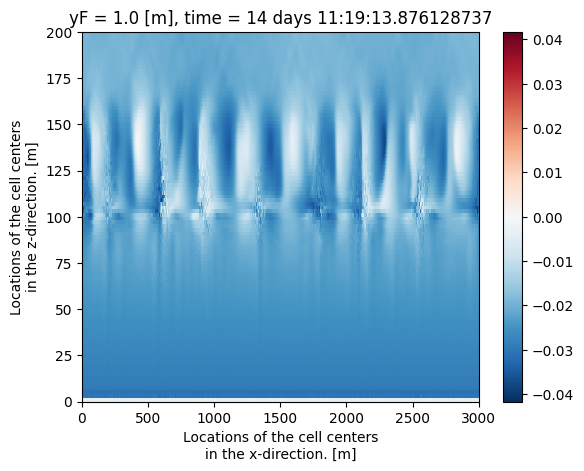

In [19]:
# vmin and vmax control colorbar range
# for i in range(len(ocean_data.time)):
# show timw -20, -25, -30, -35
q = -2
v[q].plot()
# xr.plot.contour(b[q,:,:,0],levels=20,cmap="gray")
# # plt.title("Small Pertubations w/0 Background")
# plt.show()

In [26]:
v.time[0:10]

<xarray.DataArray 'time' (time: 10)>
array([             0,  6283185307180, 12566370614359, 18849555921539,
       25132741228718, 31415926535898, 37699111843078, 43982297150257,
       50265482457437, 56548667764616], dtype='timedelta64[ns]')
Coordinates:
  * time     (time) timedelta64[ns] 00:00:00 ... 15:42:28.667764616
Attributes:
    long_name:  Time

In [35]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["animation.html"] = "jshtml"
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, ax = plt.subplots()

frms = len(v.time[0:10])
def animate(t):
    plt.cla()
    v[t].plot(add_colorbar=False)

matplotlib.animation.FuncAnimation(fig, animate, frames=frms)

b[1].plot()